Denver Delays

Downloaded from 
 - ```https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?display=data&pn=1```

"Trying to predict the future is a discouraging and hazardous occupation," 
- Arthur C. Clark

In [1]:
import pandas as pd
import numpy as np

In [2]:
datafile = '802772815_92017_5649_airline_delay_causes.csv'
df = pd.read_csv(datafile)

In [3]:
df.shape

(1050, 22)

In [4]:
df = df.drop('Unnamed: 21', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 21 columns):
year                   1050 non-null int64
 month                 1050 non-null int64
carrier                1050 non-null object
carrier_name           1050 non-null object
airport                1050 non-null object
airport_name           1050 non-null object
arr_flights            1048 non-null float64
arr_del15              1045 non-null float64
carrier_ct             1048 non-null float64
 weather_ct            1048 non-null float64
nas_ct                 1048 non-null float64
security_ct            1048 non-null float64
late_aircraft_ct       1048 non-null float64
arr_cancelled          1048 non-null float64
arr_diverted           1048 non-null float64
 arr_delay             1048 non-null float64
 carrier_delay         1048 non-null float64
weather_delay          1048 non-null float64
nas_delay              1048 non-null float64
security_delay         1048 non-null float64
l

In [18]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [52]:
df.year.value_counts()

2017    1050
Name: year, dtype: int64

In [56]:
# df.arr_del15.value_counts()

In [36]:
df.arr_flights.describe()

count     1048.000000
mean       437.716603
std       1125.676076
min          1.000000
25%         59.000000
50%        121.500000
75%        324.000000
max      19640.000000
Name: arr_flights, dtype: float64

In [37]:
df[df.arr_flights ==1]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
386,2017,9,EV,ExpressJet Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",1.0,NaN,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442,2017,9,EV,ExpressJet Airlines Inc.,GTR,"Columbus, MS: Golden Triangle Regional",1.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,2017,9,EV,ExpressJet Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",1.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760,2017,9,OO,SkyWest Airlines Inc.,MIA,"Miami, FL: Miami International",1.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,2017,9,OO,SkyWest Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",1.0,1.0,0.0,0.44,...,0.0,0.0,0.0,0.0,36.0,0.0,16.0,20.0,0.0,0.0
869,2017,9,UA,United Air Lines Inc.,EGE,"Eagle, CO: Eagle County Regional",1.0,NaN,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# df[df.arr_del15 in range(1, 19640)]

In [35]:
# df[' weather_ct'].min()
for i in range(len(df.columns)):
    print df[df.columns[i]].min()

2017
9
AA
Alaska Airlines Inc.
ABE
Aberdeen, SD: Aberdeen Regional
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [26]:
df.corr()[['late_aircraft_delay']]

,late_aircraft_delay
year,NaN
month,NaN
arr_flights,0.878126
arr_del15,0.959481
carrier_ct,0.906181
weather_ct,0.754002
nas_ct,0.814165
security_ct,0.536866
late_aircraft_ct,0.978911
arr_cancelled,0.530070


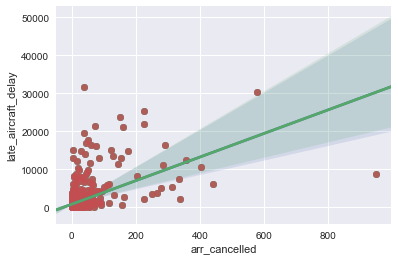

In [20]:
sns.regplot(x= df['arr_cancelled'], y=df['late_aircraft_delay'])

 
# use the function regplot to make a scatterplot
sns.regplot(x= df['arr_cancelled'], y=df['late_aircraft_delay'])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x= df['arr_cancelled'], y=df['late_aircraft_delay'], fit_reg=False)
#sns.plt.show()


In [5]:
df.columns

Index([u'year', u' month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u' weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u' arr_delay', u' carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay'],
      dtype='object')

In [6]:
df.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2017,9,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",175.0,14.0,6.02,0.0,...,0.0,5.47,0.0,0.0,646.0,197.0,0.0,70.0,0.0,379.0
1,2017,9,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",79.0,8.0,4.37,0.0,...,0.0,2.86,0.0,0.0,424.0,182.0,0.0,25.0,0.0,217.0


In [7]:
for col in df.columns:
    print col

year
 month
carrier
carrier_name
airport
airport_name
arr_flights
arr_del15
carrier_ct
 weather_ct
nas_ct
security_ct
late_aircraft_ct
arr_cancelled
arr_diverted
 arr_delay
 carrier_delay
weather_delay
nas_delay
security_delay
late_aircraft_delay


In [8]:
len(df.columns)

21

In [15]:
zipped_dict = dict(zip(df.airport, df.airport_name))
len(zipped_dict)

292

In [34]:
airports = pd.DataFrame(zipped_dict.values(), zipped_dict.keys())
airports.head()

,0
JFK,"New York, NY: John F. Kennedy International"
GSP,"Greer, SC: Greenville-Spartanburg International"
FNT,"Flint, MI: Bishop International"
SIT,"Sitka, AK: Sitka Rocky Gutierrez"
MIA,"Miami, FL: Miami International"


In [35]:
# df.sample(10)

In [36]:
airport_list = []
airport_dict = dict(df['airport'].value_counts())
for key, value in airport_dict.items():    
    airport_list.append(key)
#     print (key + ": " + str(value) )
# airport_list
# sorted(airport_list)

In [37]:
import matplotlib as plt
%matplotlib inline

In [38]:
from mpl_toolkits.basemap import Basemap

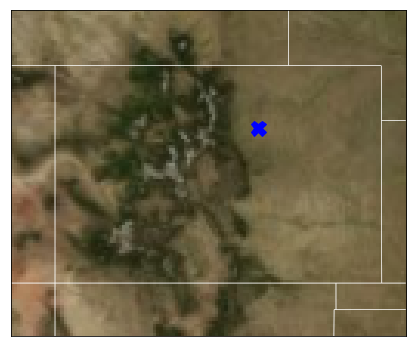

In [39]:
plt.rcParams["figure.figsize"] = [10, 6]
mDen = Basemap(projection='mill',
            llcrnrlat = 36.0,
            llcrnrlon = -110,
            urcrnrlat = 42.0,
            urcrnrlon = -101.5,
            resolution='l')

mDen.drawstates(color='w')

DENlat, DENlon = 39.861667, -104.673056
xpt, ypt = mDen(DENlon, DENlat)
mDen.plot(xpt, ypt, 'bX', markersize=15)
mDen.bluemarble()


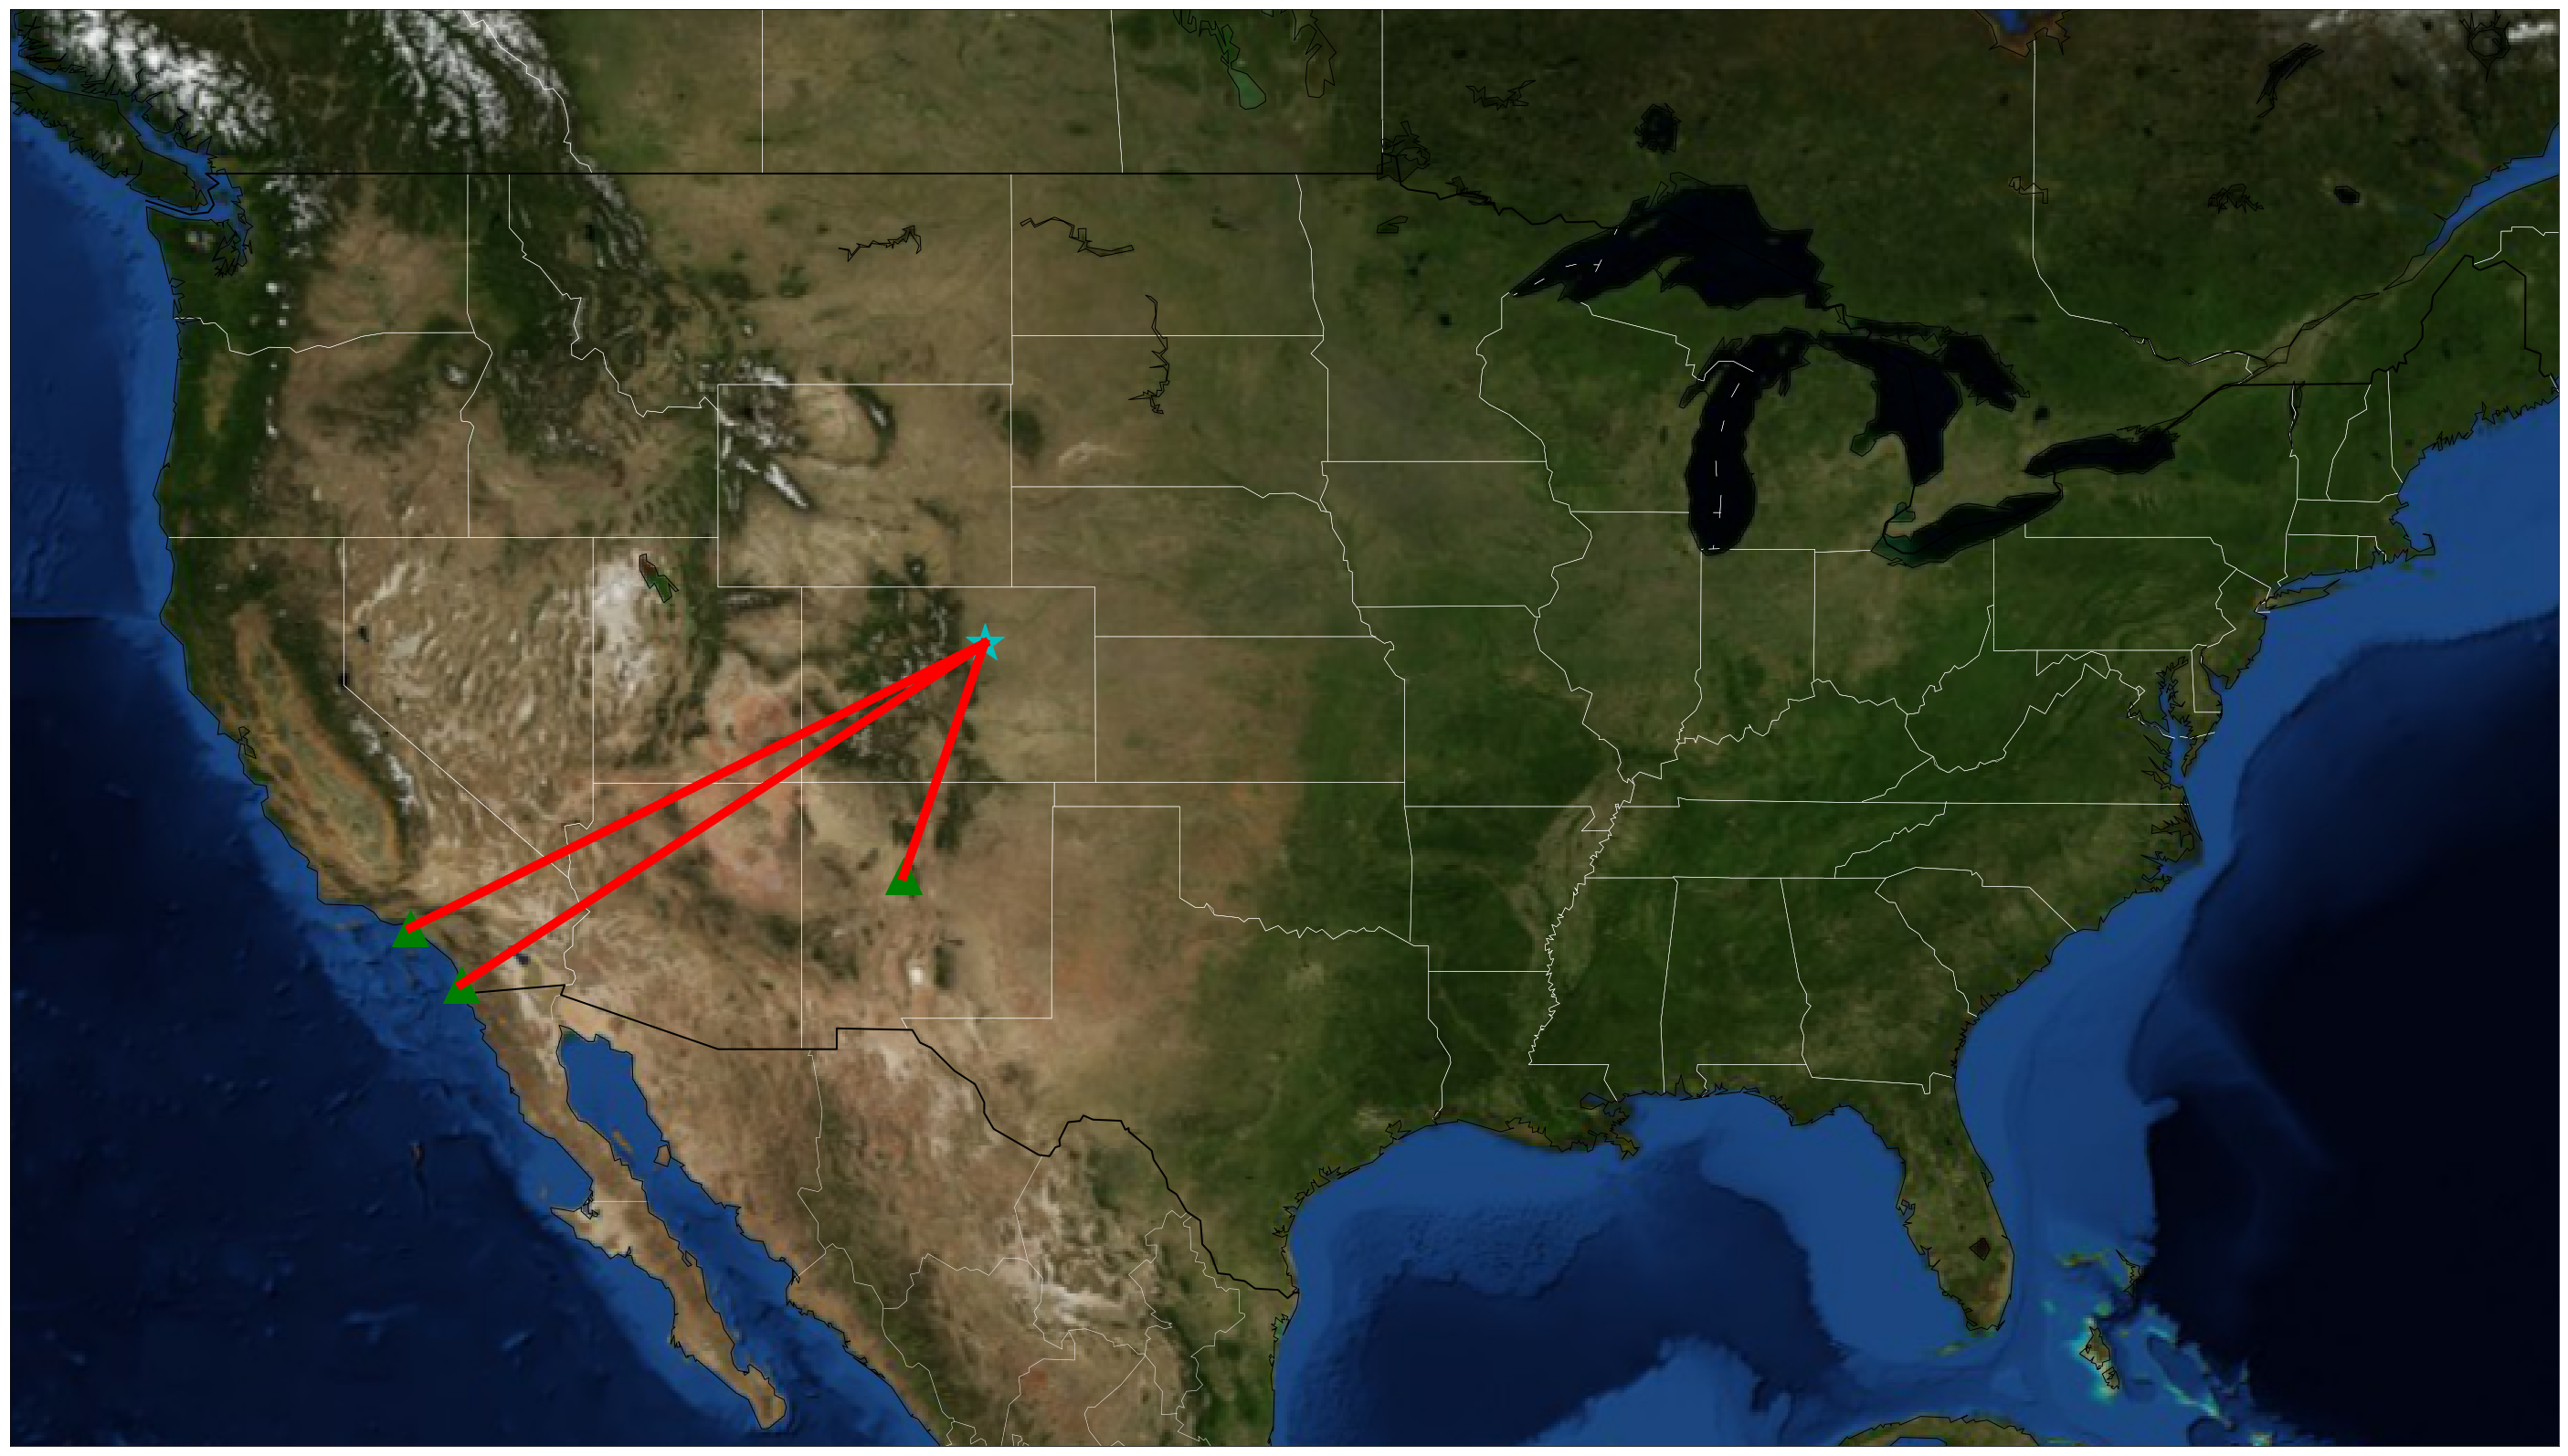

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [50, 30]
mUSA = Basemap(projection='mill',
            llcrnrlat = 22.5,
            llcrnrlon = -128,
            urcrnrlat = 52.0,
            urcrnrlon = -67,
            resolution='l')

mUSA.drawstates(color='w')
# *****
xToLAX = []
yToLAX = []

DENlat, DENlon = 39.861667, -104.673056
xpt, ypt = mUSA(DENlon, DENlat)
xToLAX.append(xpt)
yToLAX.append(ypt)
mUSA.plot(xpt, ypt, 'c*', markersize=45)

LAXlat, LAXlon = 33.942791, -118.410042
xpt, ypt = mUSA(LAXlon, LAXlat)
xToLAX.append(xpt)
yToLAX.append(ypt)
mUSA.plot(xpt, ypt, 'g^', markersize=40)


mUSA.plot(xToLAX, yToLAX, color='r', linewidth=10, label='flight')
# *****
xToSAN = []
yToSAN = []

xpt, ypt = mUSA(DENlon, DENlat)
xToSAN.append(xpt)
yToSAN.append(ypt)

SANlat, SANlon = 32.731770, -117.197624
xpt, ypt = mUSA(SANlon, SANlat)
xToSAN.append(xpt)
yToSAN.append(ypt)
mUSA.plot(xpt, ypt, 'g^', markersize=40)
mUSA.plot(xToSAN, yToSAN, color='r', linewidth=10, label='flight')


# *****

xToABQ = []
yToABQ = []

xpt, ypt = mUSA(DENlon, DENlat)
xToABQ.append(xpt)
yToABQ.append(ypt)

ABQlat, ABQlon = 35.043333, -106.612909
xpt, ypt = mUSA(ABQlon, ABQlat)
xToABQ.append(xpt)
yToABQ.append(ypt)
mUSA.plot(xpt, ypt, 'g^', markersize=40)
mUSA.plot(xToABQ, yToABQ, color='r', linewidth=10, label='flight')
# *****
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)

mUSA.bluemarble()

In [15]:
# airport_dict = dict(df['airport'].value_counts())

# for idx, val in df['airport'].iterrows():
#     icao = idx
#     latitude = val[6]
#     longitude = val[7]
#     x,y = map(longitude, latitude)
#     map.plot(x, y, 'ro', markersize=2)

In [16]:
# build a fuction that takes in an airport, and returns a line drawn from DIA to that airport

# def den_to_dest(airport):
    

In [17]:
# !conda install -c jacksongs pygeocoder --yes

In [18]:
from pygeocoder import Geocoder

In [19]:
results = Geocoder.reverse_geocode(DENlat, DENlon)

In [20]:
results.state

u'Colorado'

In [21]:
result2 = Geocoder.geocode("Los Angeles International Airport")

In [272]:
result2.city

u'Los Angeles'

In [37]:

g = Geocoder.geocode(df['airport_name'][0])
g.coordinates

(35.0433333, -106.6129085)

In [63]:
len(df['airport_name'].unique())

292

In [61]:
len(df['airport_name'].value_counts())

292

In [49]:
airports_counts_dict = dict(df['airport_name'].value_counts())

In [65]:
def combine_key_and_coords():
    """
    function takes in a variable and returns a list of 
    """

Atlanta, GA: Hartsfield-Jackson Atlanta International
Hartford, CT: Bradley International
Toledo, OH: Toledo Express
Phoenix, AZ: Phoenix Sky Harbor International
Tampa, FL: Tampa International
Fort Smith, AR: Fort Smith Regional
Houston, TX: George Bush Intercontinental/Houston
Philadelphia, PA: Philadelphia International
Columbia, SC: Columbia Metropolitan
Chicago, IL: Chicago Midway International
Columbus, GA: Columbus Airport
Knoxville, TN: McGhee Tyson
Roswell, NM: Roswell International Air Center
Williston, ND: Sloulin Field International
Adak Island, AK: Adak
Tulsa, OK: Tulsa International
West Yellowstone, MT: Yellowstone
Bismarck/Mandan, ND: Bismarck Municipal
Barrow, AK: Wiley Post/Will Rogers Memorial
La Crosse, WI: La Crosse Regional
Montgomery, AL: Montgomery Regional
Baltimore, MD: Baltimore/Washington International Thurgood Marshall
Billings, MT: Billings Logan International
Fort Myers, FL: Southwest Florida International
New York, NY: LaGuardia
Denver, CO: Denver Intern

In [60]:
airports_counts_dict.keys()[0]

'Atlanta, GA: Hartsfield-Jackson Atlanta International'

In [33]:
df['airport_name'][0]

'Albuquerque, NM: Albuquerque International Sunport'

In [32]:

for f in df['airport_name']:
    print f

Albuquerque, NM: Albuquerque International Sunport
Albany, NY: Albany International
Amarillo, TX: Rick Husband Amarillo International
Anchorage, AK: Ted Stevens Anchorage International
Atlanta, GA: Hartsfield-Jackson Atlanta International
Austin, TX: Austin - Bergstrom International
Hartford, CT: Bradley International
Nashville, TN: Nashville International
Boise, ID: Boise Air Terminal
Boston, MA: Logan International
Buffalo, NY: Buffalo Niagara International
Baltimore, MD: Baltimore/Washington International Thurgood Marshall
Bozeman, MT: Bozeman Yellowstone International
Charleston, SC: Charleston AFB/International
Cleveland, OH: Cleveland-Hopkins International
Charlotte, NC: Charlotte Douglas International
Columbus, OH: John Glenn Columbus International
Colorado Springs, CO: City of Colorado Springs Municipal
Cincinnati, OH: Cincinnati/Northern Kentucky International
Dayton, OH: James M Cox/Dayton International
Washington, DC: Ronald Reagan Washington National
Denver, CO: Denver Inte